# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **We will now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this case study, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t 
from scipy.stats import ttest_ind_from_stats
from numpy.random import seed

In [133]:
medical = pd.read_csv(r'C:\Users\ghaza\OneDrive\Desktop\Projects\Spring board\Assignments\UNIT 22.1\1585247986_Frequentist_Case_Study (1)\Frequentist Case Study\insurance2.csv')

In [134]:
medical.shape

(1338, 8)

In [135]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Data appears to be skewed to the right, which indicates that most people have lower charges, with fewer people having significantly higher charges. Due to skewed distribution, the calculated sample mean is pulled in the direction of the tail (mean=13270.42). The standard deviation measures the spread of the data points around the mean. A larger standard deviation indicates that the charges vary widely from the mean, suggesting significant differences in the costs incurred by different patients. Conversely, a smaller standard deviation suggests that the charges are more uniformly distributed around the mean.(standard deviation=12105.48). Out of 1338 cases, only less than 10 cases charged more than 6000. That impies there are some outliers in our data that CAN affect the mean and standard deviation and identifying them can provide insights into extreme cases within the dataset. 

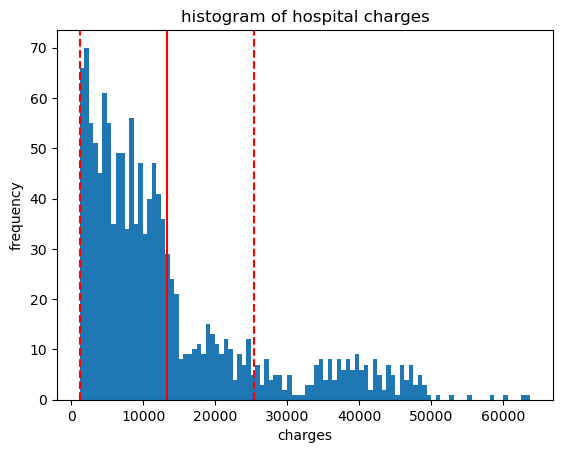

In [136]:
plt.hist(medical['charges'],bins=100)
plt.xlabel('charges')
plt.ylabel('frequency')
plt.title('histogram of hospital charges')
plt.axvline(np.mean(medical['charges']), color='r', linestyle='-')
plt.axvline(np.mean(medical['charges'])+np.std(medical['charges']), color='r', linestyle='--')
plt.axvline(np.mean(medical['charges'])-np.std(medical['charges']), color='r', linestyle='--')
plt.show()

In [137]:
s = np.std(medical['charges'])
s

12105.484975561605

In [138]:
m = np.mean(medical['charges'])
m

13270.422265141257

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Given the concern is about the mean charge possibly falling below a specific value 12,000, and assuming normality of the data distribution or a sufficiently large sample size for the Central Limit Theorem to apply, the most appropriate test would be a one-sample t-test. This test is used to determine whether the sample mean significantly differs from a known or hypothesized population mean (in this case, 12,000).**Since the distribution of the charges in our sample is heavily skewed then its best to increase our sample size and calculate the CI based on Bootstraped data (Check CI_A).** **There is also another way to look at this problem:  Given that sample size is big enough, we can assume that CLT is applicable and the sample mean is close enough to the population mean. Check CI_B.**

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The administrator is only concerned with whether the lower bound of the average charge falls below a certain threshold, not whether it deviates in either direction (higher or lower). Hence, the most appropriate confidence interval to use in this context would be a one-sided confidence interval.Given the lower bound of the 95% confidence interval for the mean charge in CI_A is `$13253.43`, this suggests that we are 95% confident that the true mean charge is above `$13251`. Since the administrator's concern was whether the average charge has fallen below `$12,000`, the calculated confidence interval provides some evidence that the mean charge may not have fallen below this threshold, as the lower bound is above `$12,000`. Likewise for CI_B, lower bound in CI_B is above  `$12,000`. 

In [139]:
alpha=0.05
n=len(medical['charges'])
degree_of_freedom = n-1

In [140]:
samples_mean = np.empty(100000)
for i in range(100000):
    samples_mean[i]=np.mean(np.random.choice(medical['charges'],size=n))
point_estimate = np.mean(samples_mean)    
bootstrap_std=np.std(samples_mean)

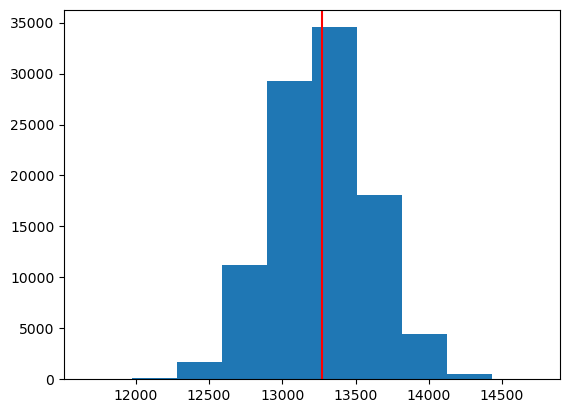

In [141]:
plt.hist(samples_mean)
plt.axvline(point_estimate, color='red')
plt.show()

In [142]:
t_score = t.ppf(alpha/2,degree_of_freedom)

In [143]:
CI_A=(point_estimate+t_score*bootstrap_std/np.sqrt(n), point_estimate-t_score*bootstrap_std/np.sqrt(n))
CI_A

(13252.038474417204, 13287.576442916456)

In [144]:
CI_B=(m+t_score*s/np.sqrt(n),m-t_score*s/np.sqrt(n))
CI_B

(12621.196780689985, 13919.647749592528)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The Null hypothesis is assuming the mean of charges for patience with insurance is equal to the mean of charges for people without insurance. The Alternative hypothesis is that they are not equal. \begin{equation}
H_0: \bar{x}_0 = \bar{x}_1 ,   H_a:\bar{x}_0  \neq  \bar{x}_1  \end{equation}  
Using pooled standard deviation, which is a weighted average of the standard deviations from two groups, we are assuming that the two groups being compared have equal variances. In other words, it is assumed that the variability or spread of the data points around the mean is the same for both groups.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [145]:
groupA = medical[medical['insuranceclaim']==1]
groupB = medical[medical['insuranceclaim']==0]
n_A = len(groupA)
n_B = len(groupB)
std_A = np.std(groupA['charges'],ddof=1)
std_B = np.std(groupB['charges'],ddof=1)
mean_A = np.mean(groupA['charges'])
mean_B = np.mean(groupB['charges'])

In [146]:
sp= np.sqrt(((n_A - 1) * std_A**2 + (n_B - 1) * std_B**2) / (n_A + n_B - 2))
t_value = (mean_A - mean_B) / (sp * np.sqrt((1/n_A) + (1/n_B)))

In [147]:
t_value = (mean_A - mean_B) / (sp * np.sqrt((1/n_A) + (1/n_B)))
t_value

11.893299030876715

In [148]:
degree_of_freedom = n_A + n_B -2
p_value_two_tailed = 2 * (1-t.cdf(abs(t_score), degree_of_freedom))
p_value_two_tailed

0.050000155153012926

In [149]:
t_stat, p_value = ttest_ind_from_stats(mean1=mean_A, std1=std_A, nobs1=n_A,
                                       mean2=mean_B, std2=std_B, nobs2=n_B,
                                       equal_var=True)
t_stat, p_value

(11.893299030876719, 4.4612302316203985e-31)

In [150]:
p_value-p_value_two_tailed

-0.050000155153012926

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__scipy.stats does not include a specific function dedicated to performing a z-test directly from sample data or summary statistics in the same way it provides ttest_ind and ttest_ind_from_stats for t-tests. 

## Learning outcomes

Having completed this project notebook, we now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test